# Flo Graph

## 필요 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from numpy import nan

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [4]:
os.listdir()[:5]

['100',
 'crawled_data',
 'day_bugs.ipynb',
 'day_genie.ipynb',
 'day_soribada.ipynb']

In [5]:
path = 'crawled_data/live_flo'
os.chdir(path)

In [6]:
file_list = os.listdir()
file_list

['live_flo_20220405.xlsx',
 'live_flo_20220406.xlsx',
 'live_flo_20220407.xlsx',
 'live_flo_20220412.xlsx',
 'live_flo_20220413.xlsx',
 'live_flo_20220414_110035.xlsx',
 'live_flo_20220415_110026.xlsx',
 'live_flo_20220418_110024.xlsx',
 'live_flo_20220419_110028.xlsx',
 'live_flo_20220420_110013.xlsx',
 'live_flo_20220421_110051.xlsx',
 'live_flo_20220422_110026.xlsx',
 'live_flo_20220423_110023.xlsx',
 'live_flo_20220425_110022.xlsx',
 'live_flo_20220426_110029.xlsx']

In [7]:
len(file_list)

15

# 수집한 파일 모두 합치기

In [8]:
start_date = '2022-04-18'
end_date = '2022-04-24'

In [9]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-05,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-05,2,TOMBOY,(여자)아이들,I NEVER DIE
2,2022-04-05,3,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
3,2022-04-05,4,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,2022-04-05,5,GANADARA (Feat. 아이유),박재범,GANADARA


In [10]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-18,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-18,2,LOVE DIVE,IVE (아이브),LOVE DIVE
2,2022-04-18,3,TOMBOY,(여자)아이들,I NEVER DIE
3,2022-04-18,4,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
4,2022-04-18,5,사랑인가 봐,멜로망스,사랑인가 봐 (사내맞선 OST 스페셜 트랙)


In [11]:
sliced_df.tail()

,날짜,순위,곡,가수,앨범
595,2022-04-23,96,밝게 빛나는 별이 되어 비춰줄게,송이한,밝게 빛나는 별이 되어 비춰줄게
596,2022-04-23,97,내가 아니라도,주호,내가 아니라도
597,2022-04-23,98,Can't Control Myself,태연 (TAEYEON),Can't Control Myself
598,2022-04-23,99,마지막 너의 인사,헤이즈 (Heize),우리들의 블루스 OST Part 2
599,2022-04-23,100,My Universe,방탄소년단,My Universe


In [12]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      600 non-null    object
 1   순위      600 non-null    int64 
 2   곡       600 non-null    object
 3   가수      600 non-null    object
 4   앨범      600 non-null    object
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


In [13]:
len(sliced_df['곡'].unique())

110

In [14]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-04-18
1,2022-04-19
2,2022-04-20
3,2022-04-21
4,2022-04-22
5,2022-04-23
6,2022-04-24


### 순위변동 열 추가한 df 생성

In [15]:
song_df_list = []
for one in sliced_df['곡'].unique():
    one_df = sliced_df[sliced_df['곡'] == one].reset_index(drop=True)
    one_df['순위변동'] = one_df['순위'] - one_df['순위'].shift(1)
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    song_df_list.append(merged_df)

## 노래 개수

In [16]:
len(song_df_list)

110

In [113]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      7 non-null      object 
 1   순위      6 non-null      float64
 2   곡       6 non-null      object 
 3   가수      6 non-null      object 
 4   앨범      6 non-null      object 
 5   순위변동    6 non-null      float64
dtypes: float64(2), object(4)
memory usage: 392.0+ bytes


In [123]:
tmp = song_df_list[25]
tmp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,26.0,Real Love,오마이걸 (OH MY GIRL),Real Love,0.0
1,2022-04-19,23.0,Real Love,오마이걸 (OH MY GIRL),Real Love,-3.0
2,2022-04-20,21.0,Real Love,오마이걸 (OH MY GIRL),Real Love,-2.0
3,2022-04-21,23.0,Real Love,오마이걸 (OH MY GIRL),Real Love,2.0
4,2022-04-22,26.0,Real Love,오마이걸 (OH MY GIRL),Real Love,3.0
5,2022-04-23,35.0,Real Love,오마이걸 (OH MY GIRL),Real Love,9.0
6,2022-04-24,NaN,NaN,NaN,NaN,NaN


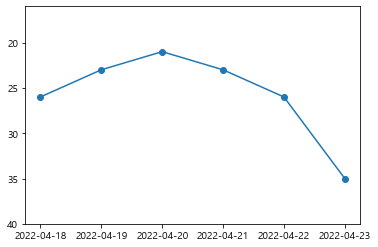

In [124]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist
min_limit = min(tmp['순위'].values)
max_limit = max(tmp['순위'].values)
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.ylim(max_limit + 5, min_limit - 5);

In [149]:
song_df_list[70]['순위'].values

array([71., 70., 67., 68., 71., 65., nan])

In [147]:
min(song_df_list[70]['순위'].values)

65.0

In [148]:
type(min(song_df_list[70]['순위'].values))

numpy.float64

In [150]:
max(song_df_list[70]['순위'].values)

71.0

In [152]:
temp_df = song_df_list[70:91]

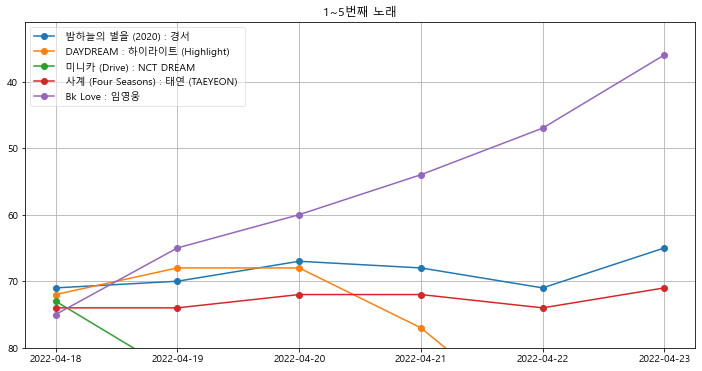

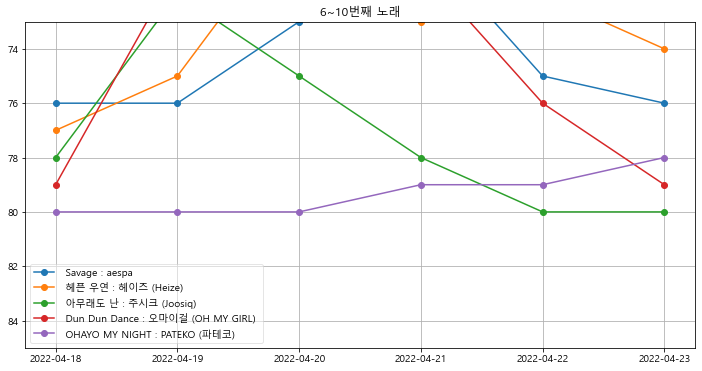

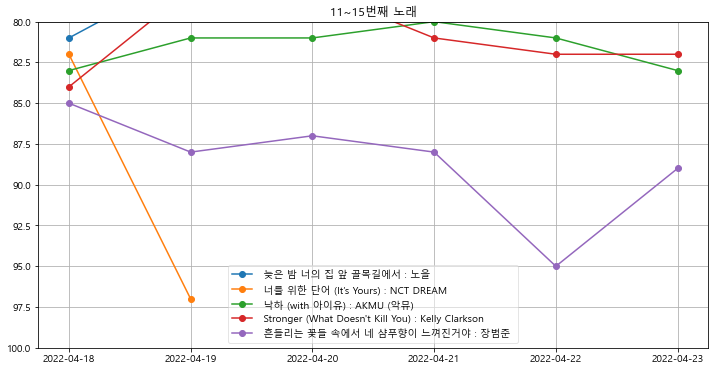

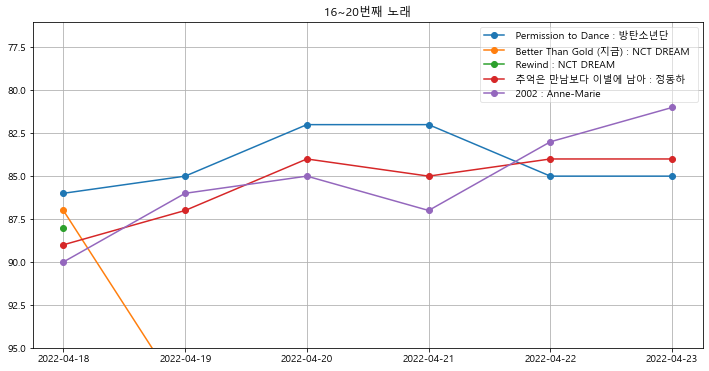

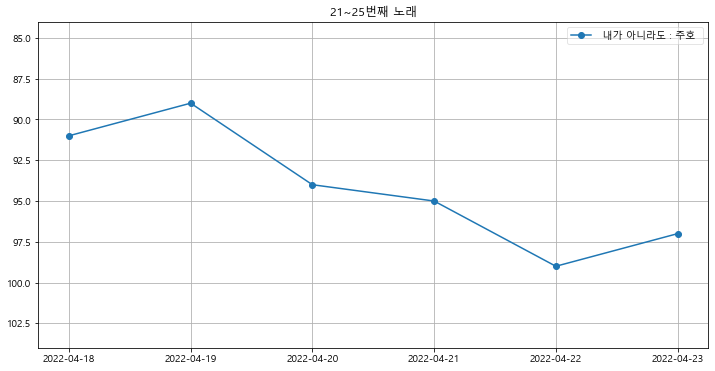

In [153]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(12, 6) )
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        min_limit = int(min(one['순위'].values))
        min_num = min_limit
        max_limit = int(max(one['순위'].values))
        max_num = max_limit
        if max_limit > max_num:
            max_num = max_limit
        if min_limit < min_num:
            min_num = min_limit
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label)
    plt.ylim(max_limit + 5, min_limit - 5)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래')
    plt.legend(framealpha=0.5)
    plt.show()

In [134]:
print(max_num, min_num)

35.0 21.0


## 몇 개씩 묶어서 노래 시각화

In [17]:
import math

### 순위 그래프

In [18]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(12, 8) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래')
        plt.legend(framealpha=0.5)
        plt.show()

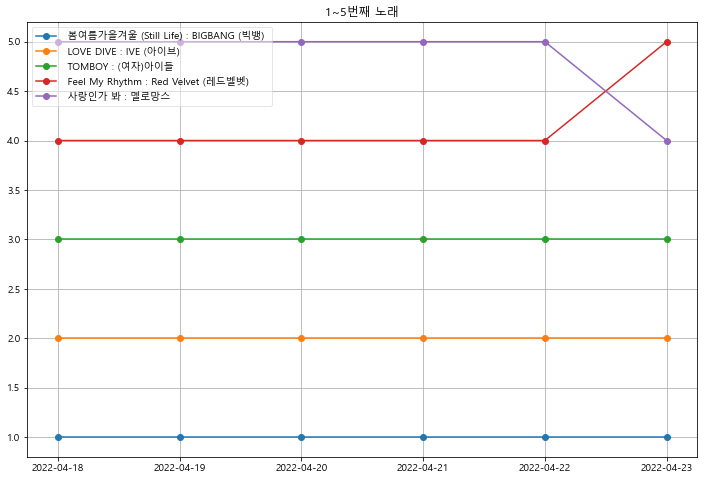

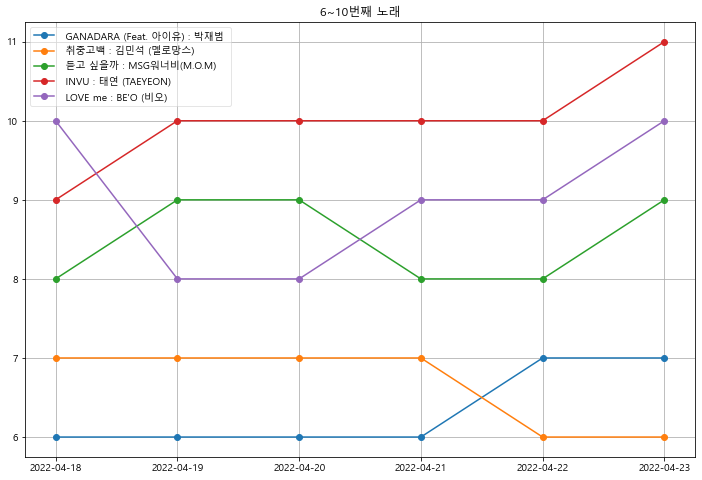

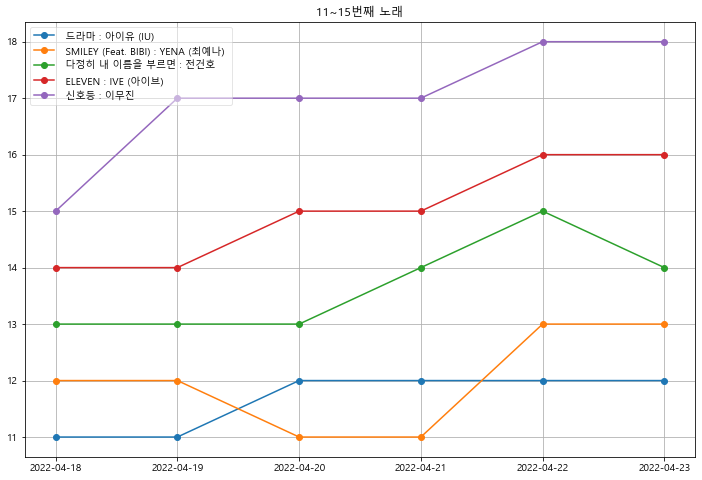

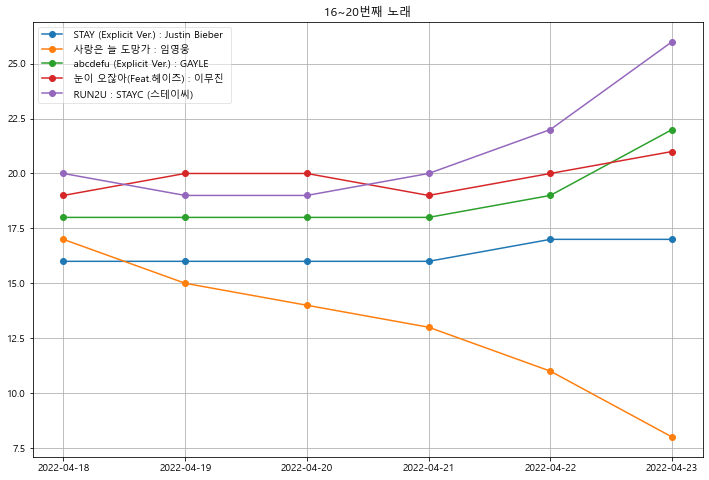

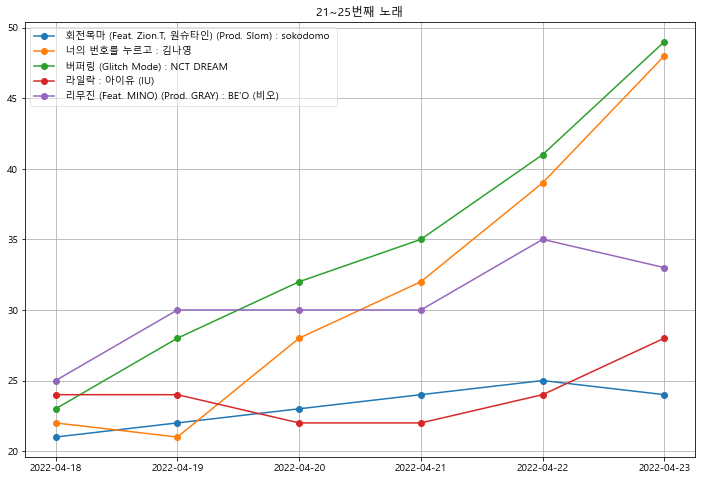

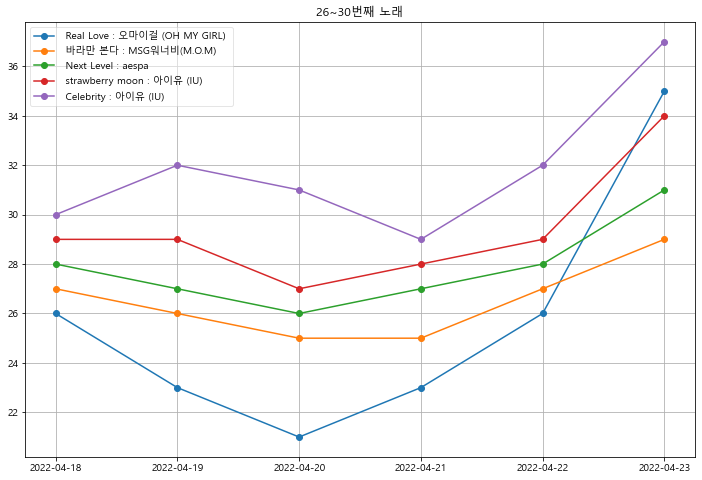

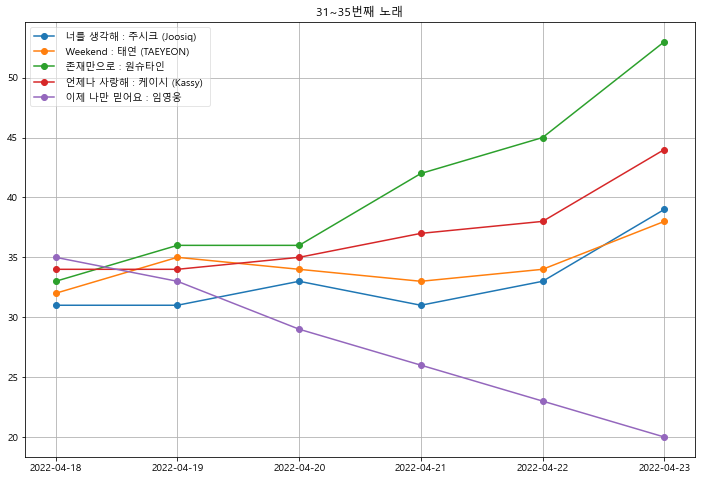

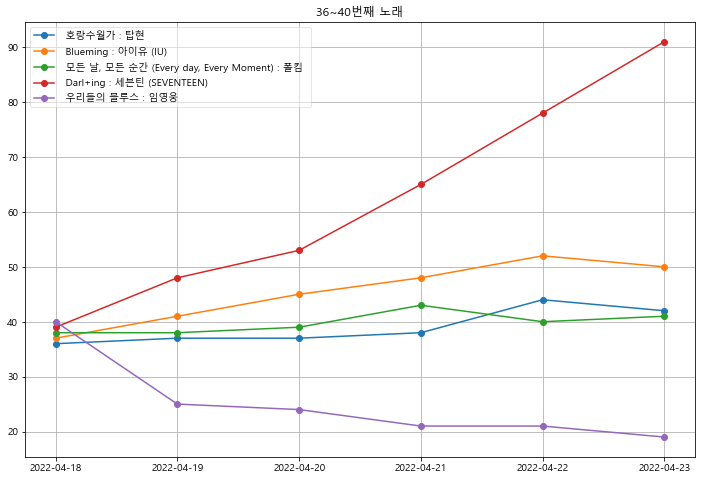

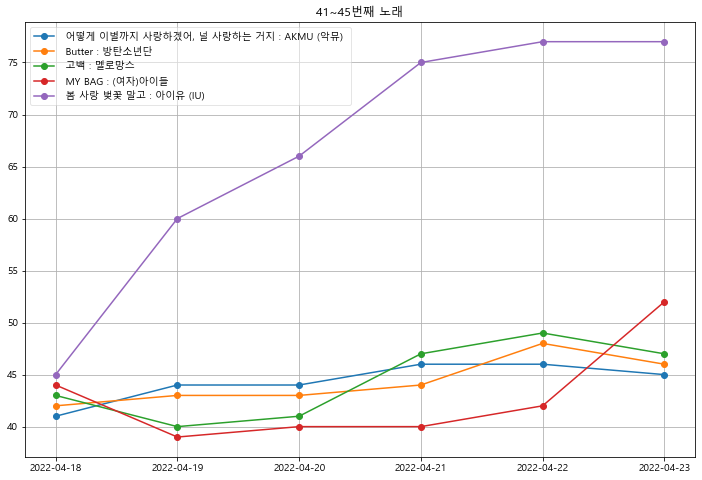

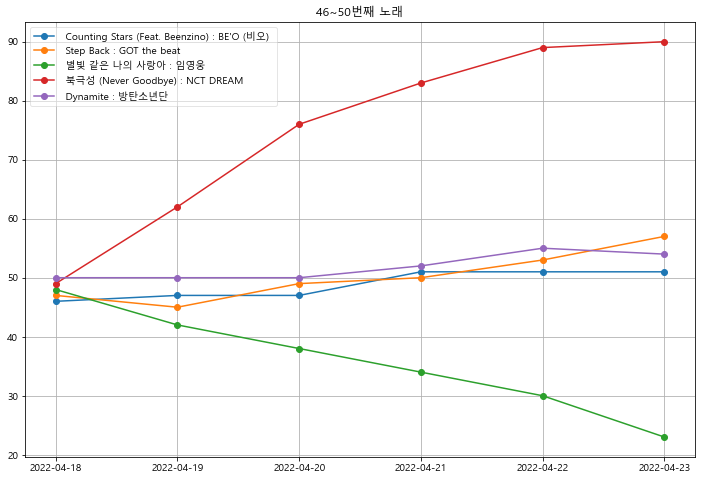

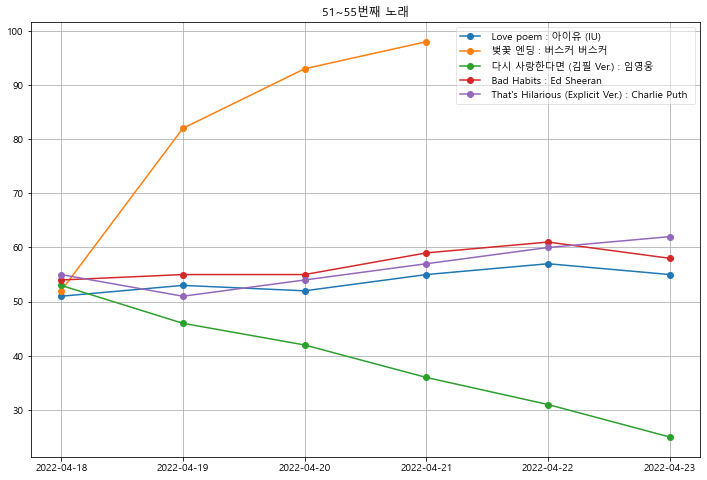

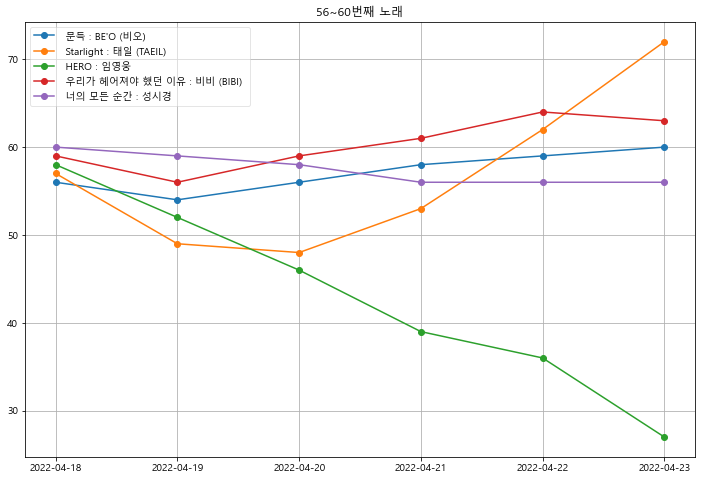

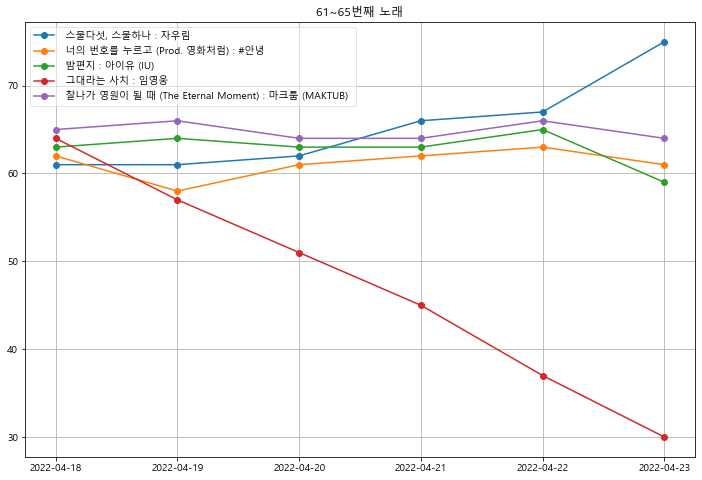

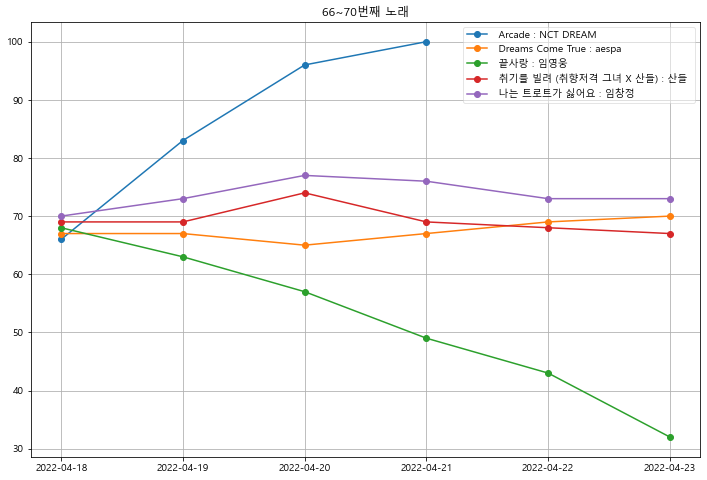

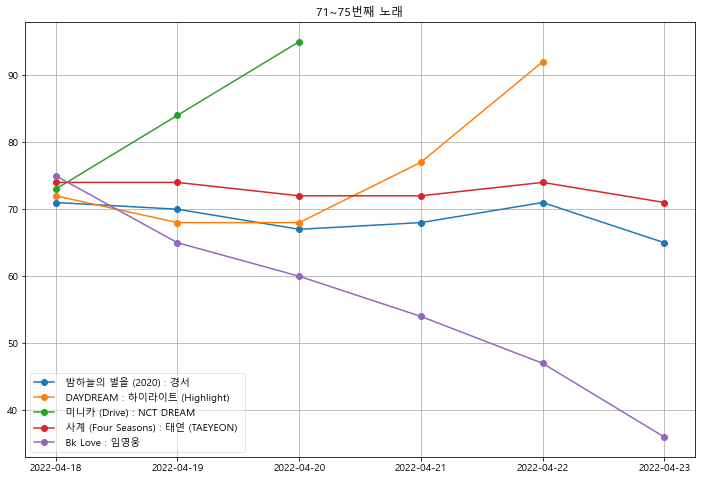

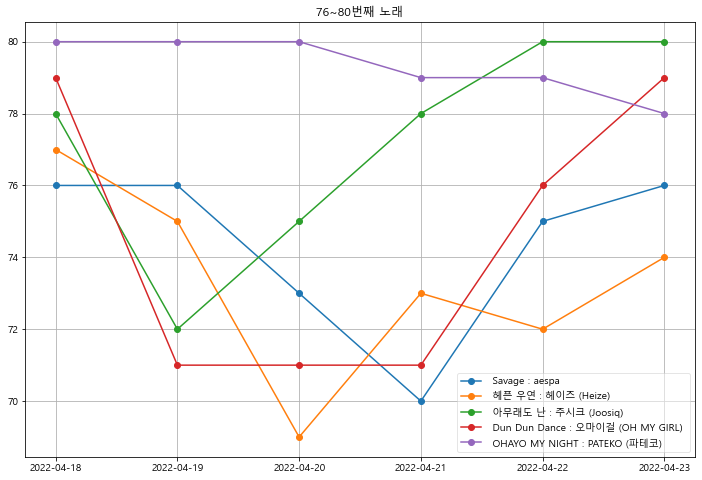

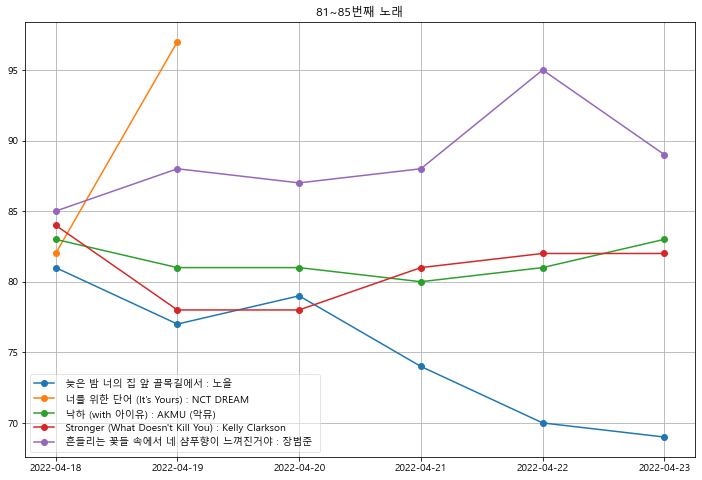

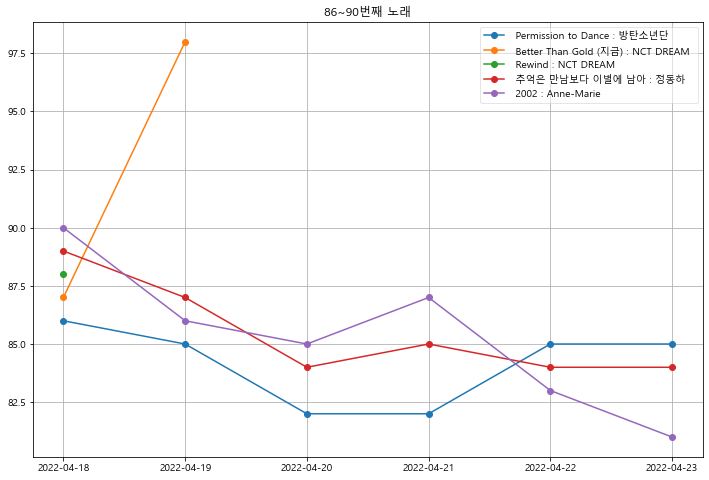

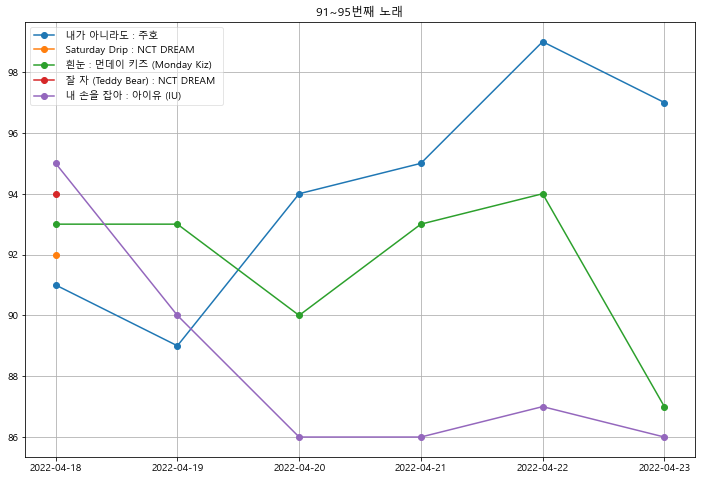

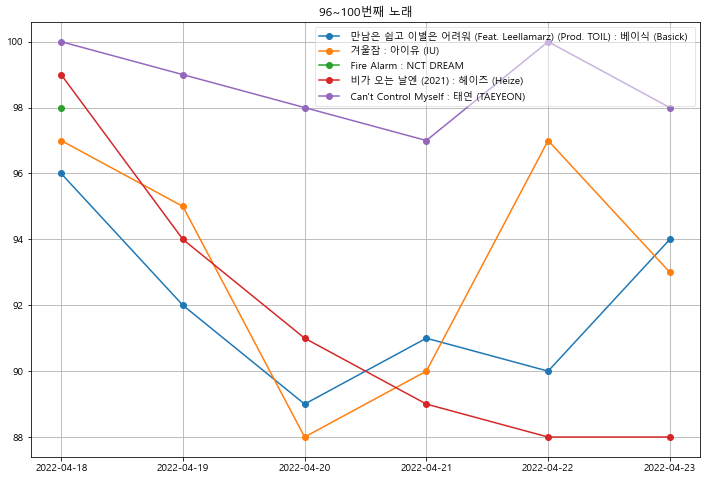

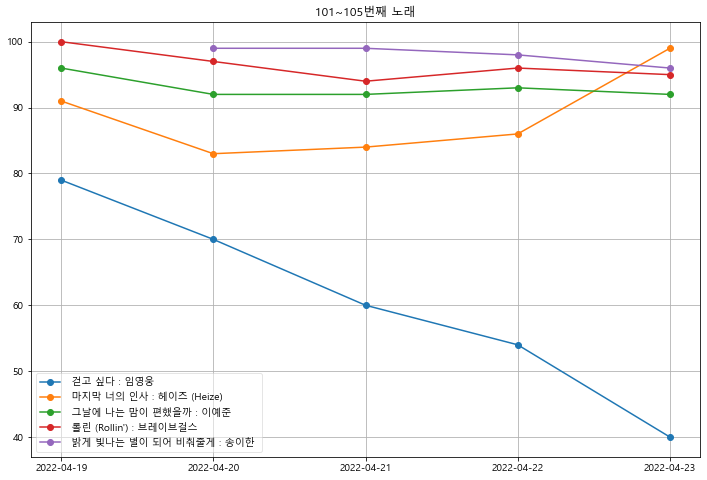

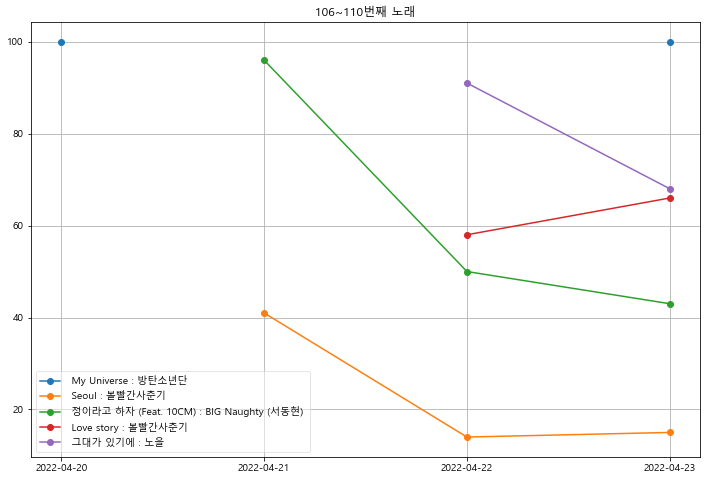

In [19]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [21]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(12, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ':' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래')
        plt.legend(framealpha=0.5)
        plt.show()

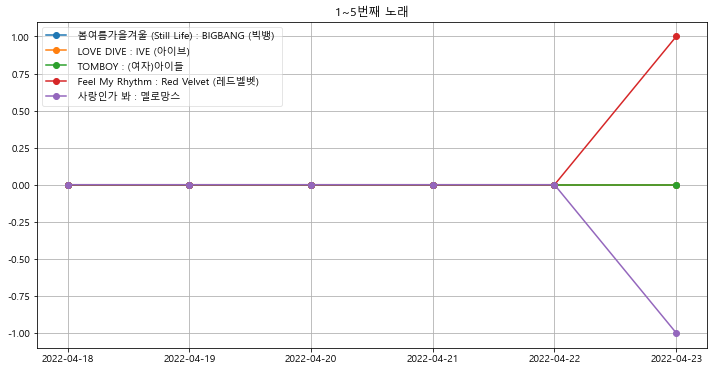

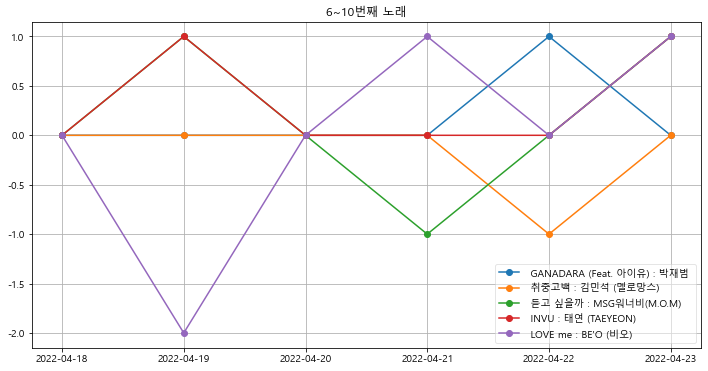

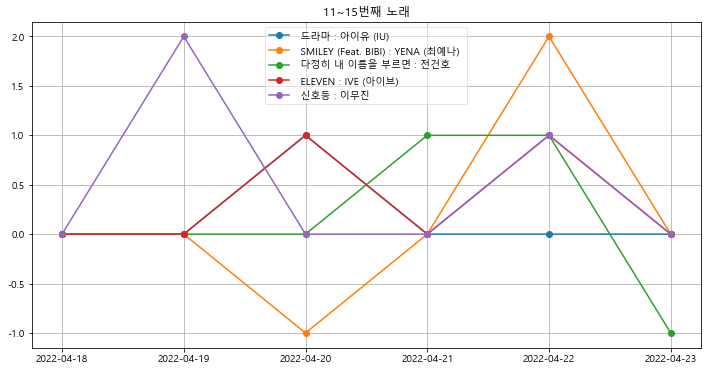

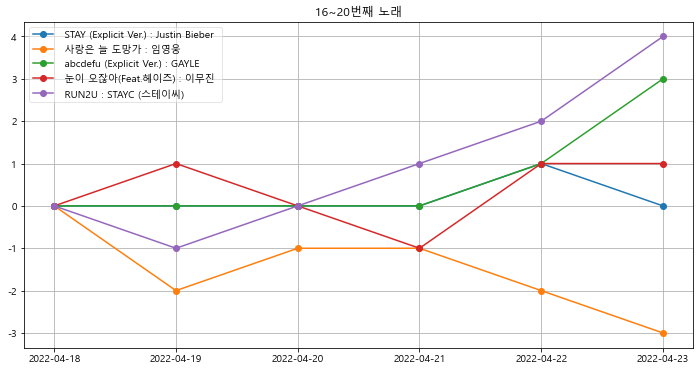

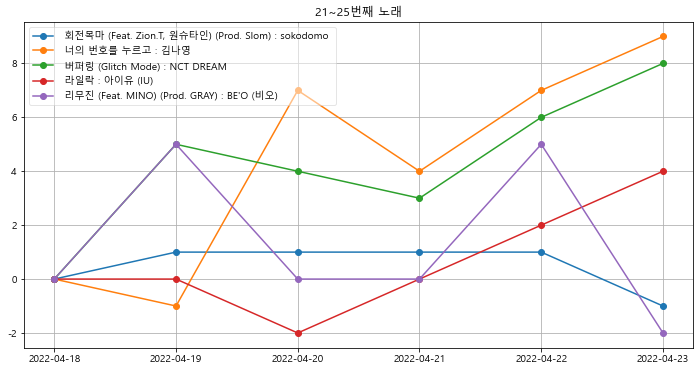

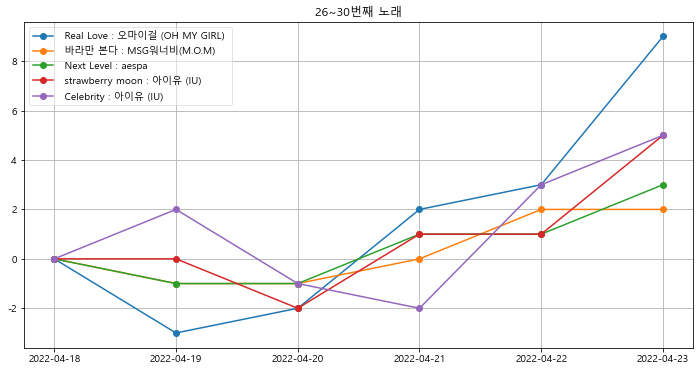

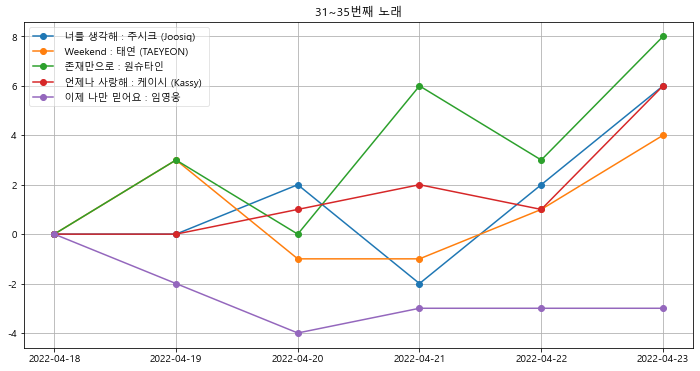

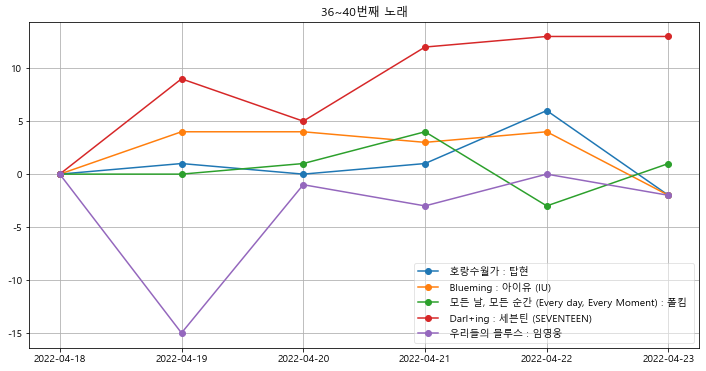

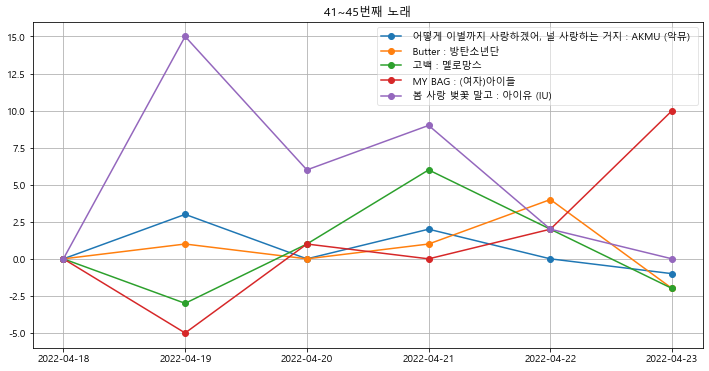

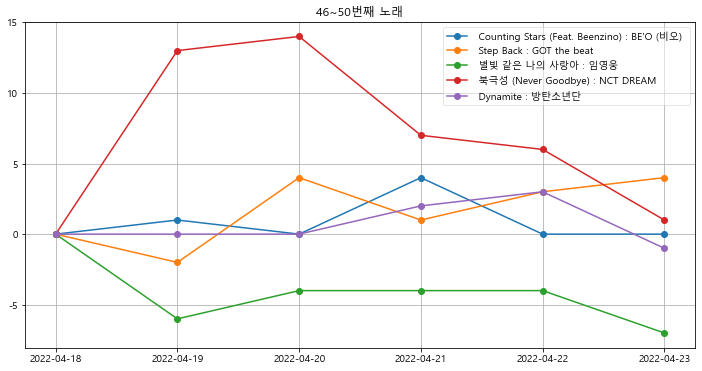

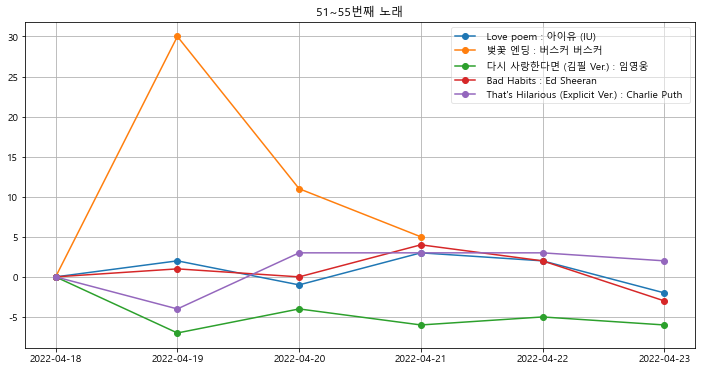

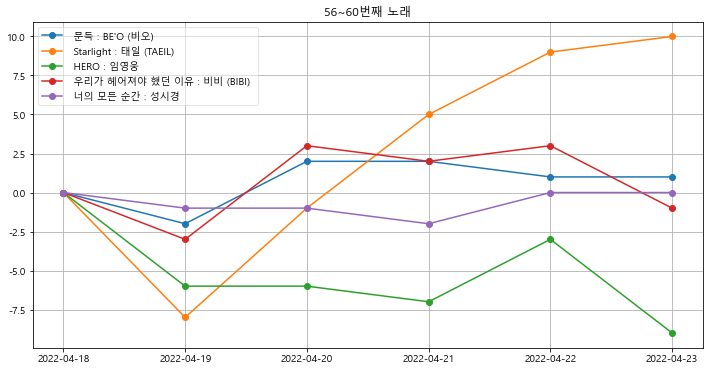

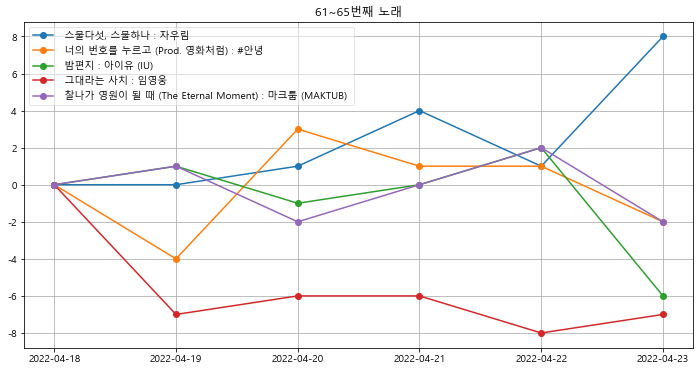

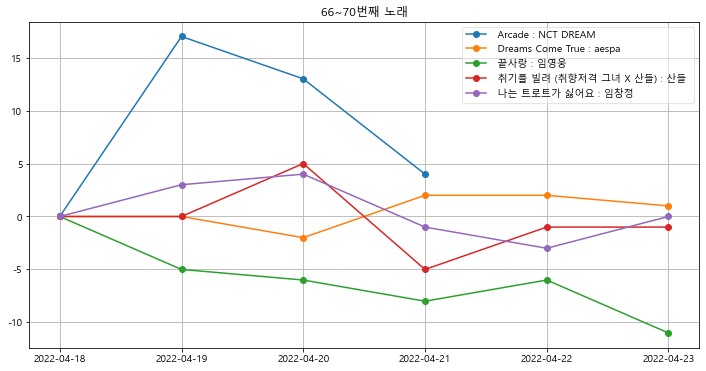

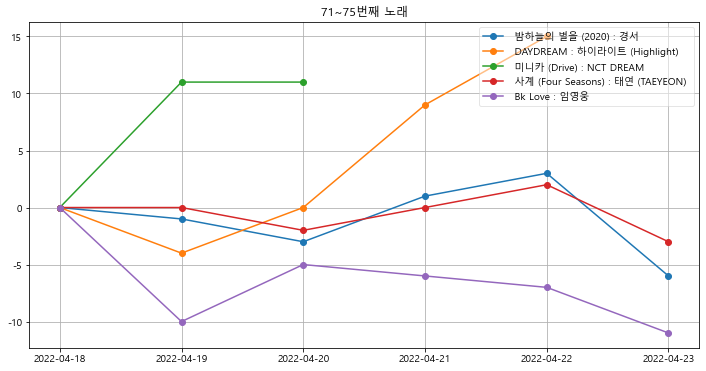

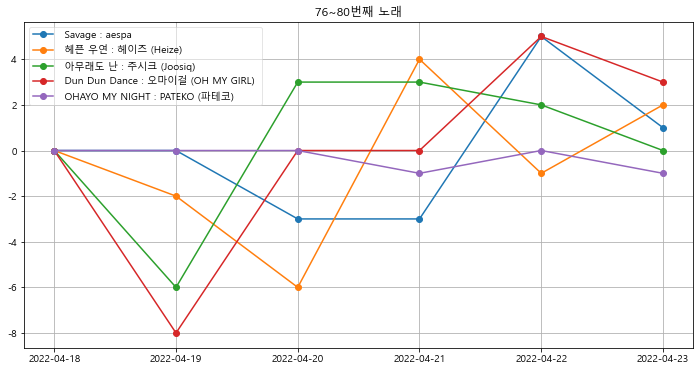

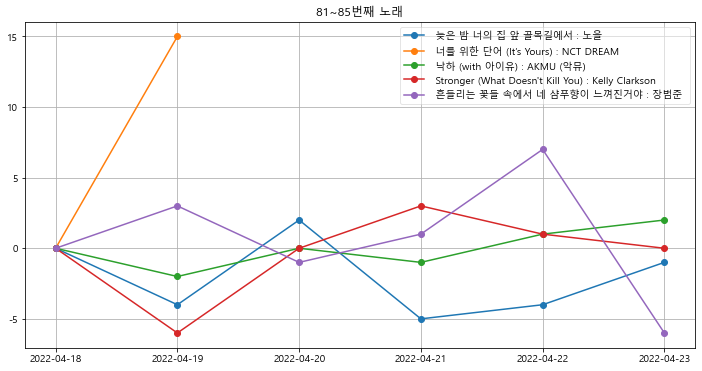

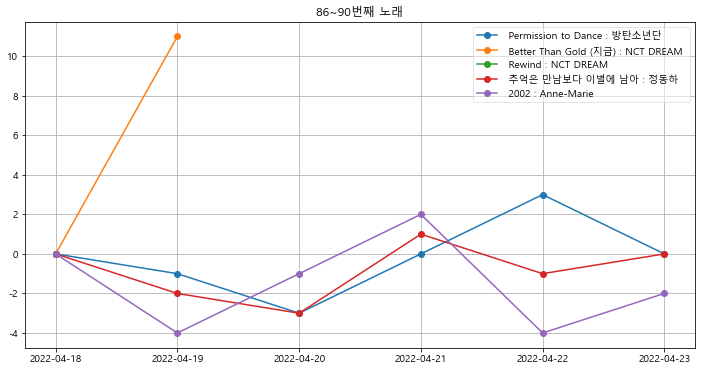

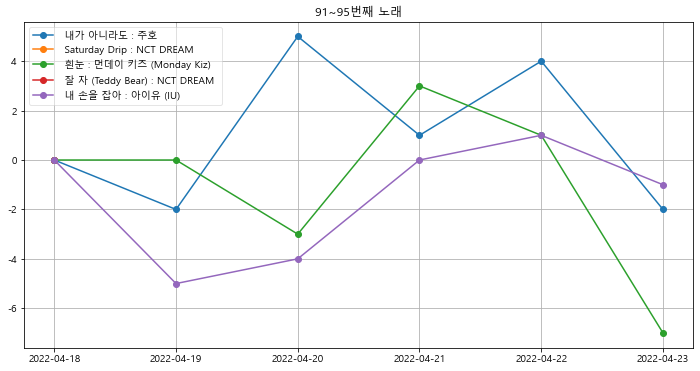

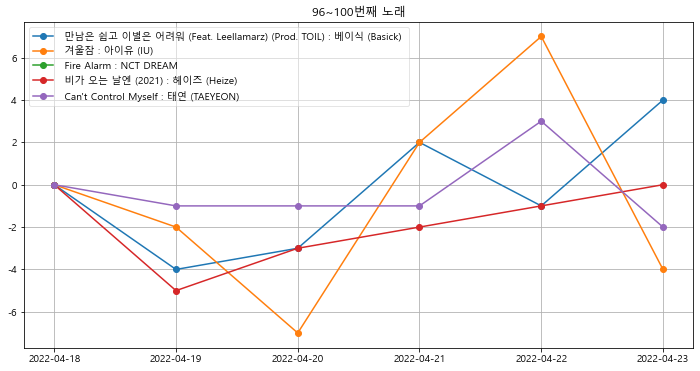

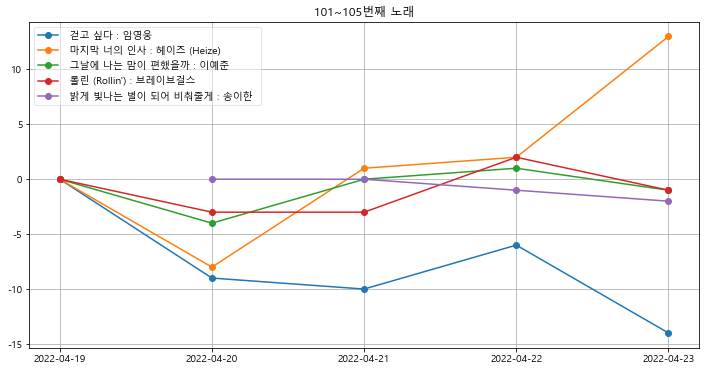

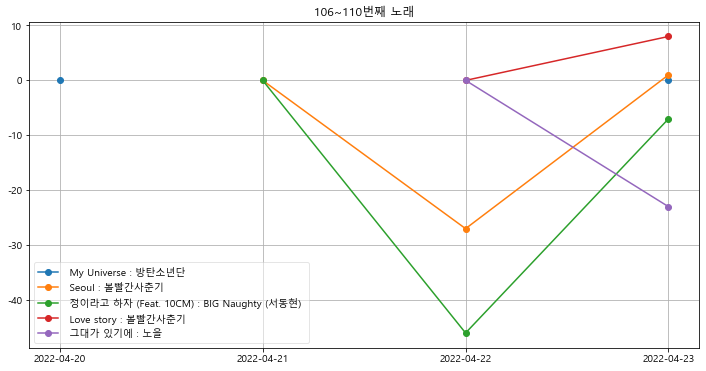

In [22]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

# 코드 마지막